In [66]:
#import packages
import pynwb
import numpy as np
import matplotlib.pyplot as plt

import os
import datajoint as dj

# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
dj.config.load("dj_local_conf_2.json")  # load config for database connection info

# ignore datajoint+jupyter async warnings
import warnings

warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=ResourceWarning)
warnings.simplefilter("ignore", category=UserWarning)

import spyglass.common as sgc
import spyglass.data_import as sgi

[2025-12-15 16:15:33,171][INFO]: DataJoint is configured from /home/dmrodriguez/spyglass/dj_local_conf_2.json


In [3]:
import spyglass.lfp as lfp

lfp.LFPOutput.LFPV1() & {"nwb_file_name": 'Jasper20251014_.nwb'}

*merge_id      nwb_file_name  lfp_electrode_ target_interva filter_name    filter_samplin
+------------+ +------------+ +------------+ +------------+ +------------+ +------------+
1f592138-1ffb- Jasper20251014 All Channels   05_s3          LFP 0-400 Hz   30000         
2f432a39-3293- Jasper20251014 All Channels   07_s4          LFP 0-400 Hz   30000         
39955361-9ca6- Jasper20251014 All Channels   03_s2          LFP 0-400 Hz   30000         
5b67b5e1-ee82- Jasper20251014 All Channels   09_s5          LFP 0-400 Hz   30000         
c72be9c0-d58d- Jasper20251014 All Channels   11_s6          LFP 0-400 Hz   30000         
d989c201-eccd- Jasper20251014 All Channels   01_s1          LFP 0-400 Hz   30000         
 (Total: 6)

In [69]:
lfp_df = (lfp.LFPOutput & {"merge_id": 'c72be9c0-d58d-1eba-978f-63692c1df83d'}).fetch1_dataframe()
channels_to_plot = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
                    100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]
df_subset = lfp_df.loc[:, channels_to_plot]
df_subset = df_subset.sort_index()
df_subset

12   13   14   15   16   17   18   19   20   21   ...  105  106  \
time                                                            ...             
1.760490e+09   24   19   21   20   14    5   12   15   24   23  ...   52   50   
1.760490e+09   57   51   46   40   37   26   31   47   52   58  ...  110  108   
1.760490e+09   65   57   52   37   41   37   39   56   56   58  ...   88   95   
1.760490e+09   59   53   51   36   42   35   56   68   72   74  ...   83   93   
1.760490e+09   50   46   37   28   36   42   64   74   68   76  ...   84   95   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1.760491e+09  -26  -25  -32  -24  -31  -28  -22  -10   -5    7  ...    7   12   
1.760491e+09  -43  -35  -43  -30  -38  -24  -29  -31  -21   -4  ...    0   12   
1.760491e+09  -40  -29  -29  -29  -32  -23  -19  -40  -41  -41  ...   17   25   
1.760491e+09    6    9    2    2    3   15   11    0   -7   -7  ...   54   54   
1.760491e+09    4    6   -7   -3   -5    9    4    0    6   19  ...   20   30   

              107  108  109  110  111  112  113  114  
time                                                  
1.760490e+09   34   46   44   40   34   33   33   29  
1.760490e+09   76   97   96   92   83   84   83   75  
1.760490e+09   75   95   94   93   87   88   88   86  
1.760490e+09   86  105  104  103   99  100  101   96  
1.760490e+09   95  105  105  108  112  111  114  102  
...           ...  ...  ...  ...  ...  ...  ...  ...  
1.760491e+09    0    9   -7  -17   -5    7   14    1  
1.760491e+09    7    0    2    2    6    9   12   -1  
1.760491e+09   17   11   13   14   13    4   13    4  
1.760491e+09   29   42   31   22   22   25   28   23  
1.760491e+09   12   23   17    7    4    6    9    6  

[905047 rows x 35 columns]

In [70]:
laser_on_intervals

[(1760484891.9750051, 1760484892.07174),
 (1760484892.4290125, 1760484892.5257142),
 (1760484895.33016, 1760484895.4267282),
 (1760484897.3603597, 1760484897.456728),
 (1760484897.6234639, 1760484897.7197323),
 (1760484898.3620093, 1760484898.4587111),
 (1760484898.6051133, 1760484898.701715),
 (1760484898.8098834, 1760484898.9067183),
 (1760484899.1663892, 1760484899.2627242),
 (1760484899.3666258, 1760484899.4627273),
 (1760484899.566829, 1760484899.6637306),
 (1760484901.5333943, 1760484901.6297295),
 (1760484902.831649, 1760484902.9277174),
 (1760484903.0411525, 1760484903.1377208),
 (1760484903.3178236, 1760484903.4147253),
 (1760484903.5822613, 1760484903.6787295),
 (1760484903.8613994, 1760484903.957734),
 (1760484904.3664408, 1760484904.462709),
 (1760484904.8872826, 1760484904.9837177),
 (1760484905.533893, 1760484905.6307282),
 (1760484905.7731304, 1760484905.8697321),
 (1760484906.003834, 1760484906.1007357),
 (1760484906.4094074, 1760484906.5057423),
 (1760484907.454058, 17

In [71]:
ephys = df_subset.to_numpy()   # (samples, channels)
pre_time  = 0.2   # seconds
post_time = 0.2
fs = 1000

n_samples = int(round((pre_time + post_time) * fs))


In [72]:
ephys

array([[ 24,  19,  21, ...,  33,  33,  29],
       [ 57,  51,  46, ...,  84,  83,  75],
       [ 65,  57,  52, ...,  88,  88,  86],
       ...,
       [-40, -29, -29, ...,   4,  13,   4],
       [  6,   9,   2, ...,  25,  28,  23],
       [  4,   6,  -7, ...,   6,   9,   6]], dtype=int16)

In [73]:
channels_to_plot = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
                    100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]

In [53]:
#load in raw nwb file with ephys data

io = pynwb.NWBHDF5IO("/stelmo/nwb/raw/Jasper20251014.nwb", mode="r")
nwbf = io.read()

In [29]:
total_timestamps = nwbf.acquisition['e-series'].timestamps[:]

In [74]:
interval = 5 #choose an interval to look at based on laser power of interest
epoch_start_time, epoch_stop_time, epoch_name = nwbf.intervals['epochs'][interval].to_numpy()[0]

In [75]:
print(epoch_name) #verify epoch of interest

['11_s6']


In [76]:
# load in laser data via DIO

laser_data = nwbf.processing['behavior'].data_interfaces['behavioral_events'].time_series['Laser'].data[:]
laser_timestamps = nwbf.processing['behavior'].data_interfaces['behavioral_events'].time_series['Laser'].timestamps[:]

laser_data_epoch = laser_data[(laser_timestamps>epoch_start_time) & (laser_timestamps<=epoch_stop_time)]
laser_data_epoch[0] = 0
laser_timestamps_epoch = laser_timestamps[(laser_timestamps>epoch_start_time) & (laser_timestamps<=epoch_stop_time)]

In [77]:
laser_data

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [78]:
# get laser data only for epoch of interest and the first laser stim of the duty cycle
laser_on_times_epoch = laser_timestamps_epoch[laser_data_epoch==1]

first_laser_on_times = laser_on_times_epoch[np.append(np.diff(laser_on_times_epoch)>0.01,True)]

(1760484890.506, 1760484990.506)

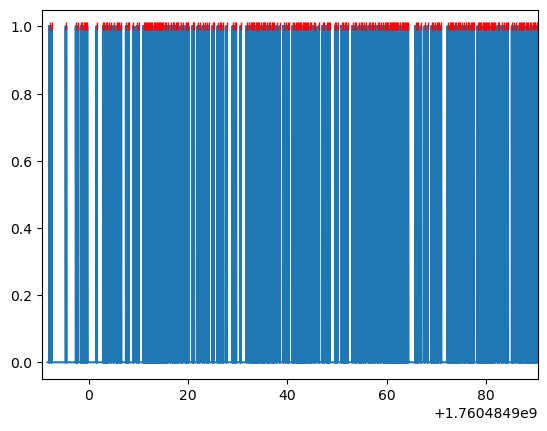

In [61]:
# plot laser stim times to make sure it is reasonable

plt.step(laser_timestamps_epoch,laser_data_epoch, where='post')
plt.plot(first_laser_on_times, np.ones(len(first_laser_on_times)), 'r|')
plt.xlim([epoch_start_time, epoch_start_time+100])

In [10]:
import numpy as np
from scipy.signal import butter, filtfilt

# quick filtering for spike band and LFP

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=4, axis=0):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data, axis=axis)

fs = 30e3

#spike filtered trace
lowcut = 300
highcut = 6000

# lowcut = 0.5
# highcut = 400


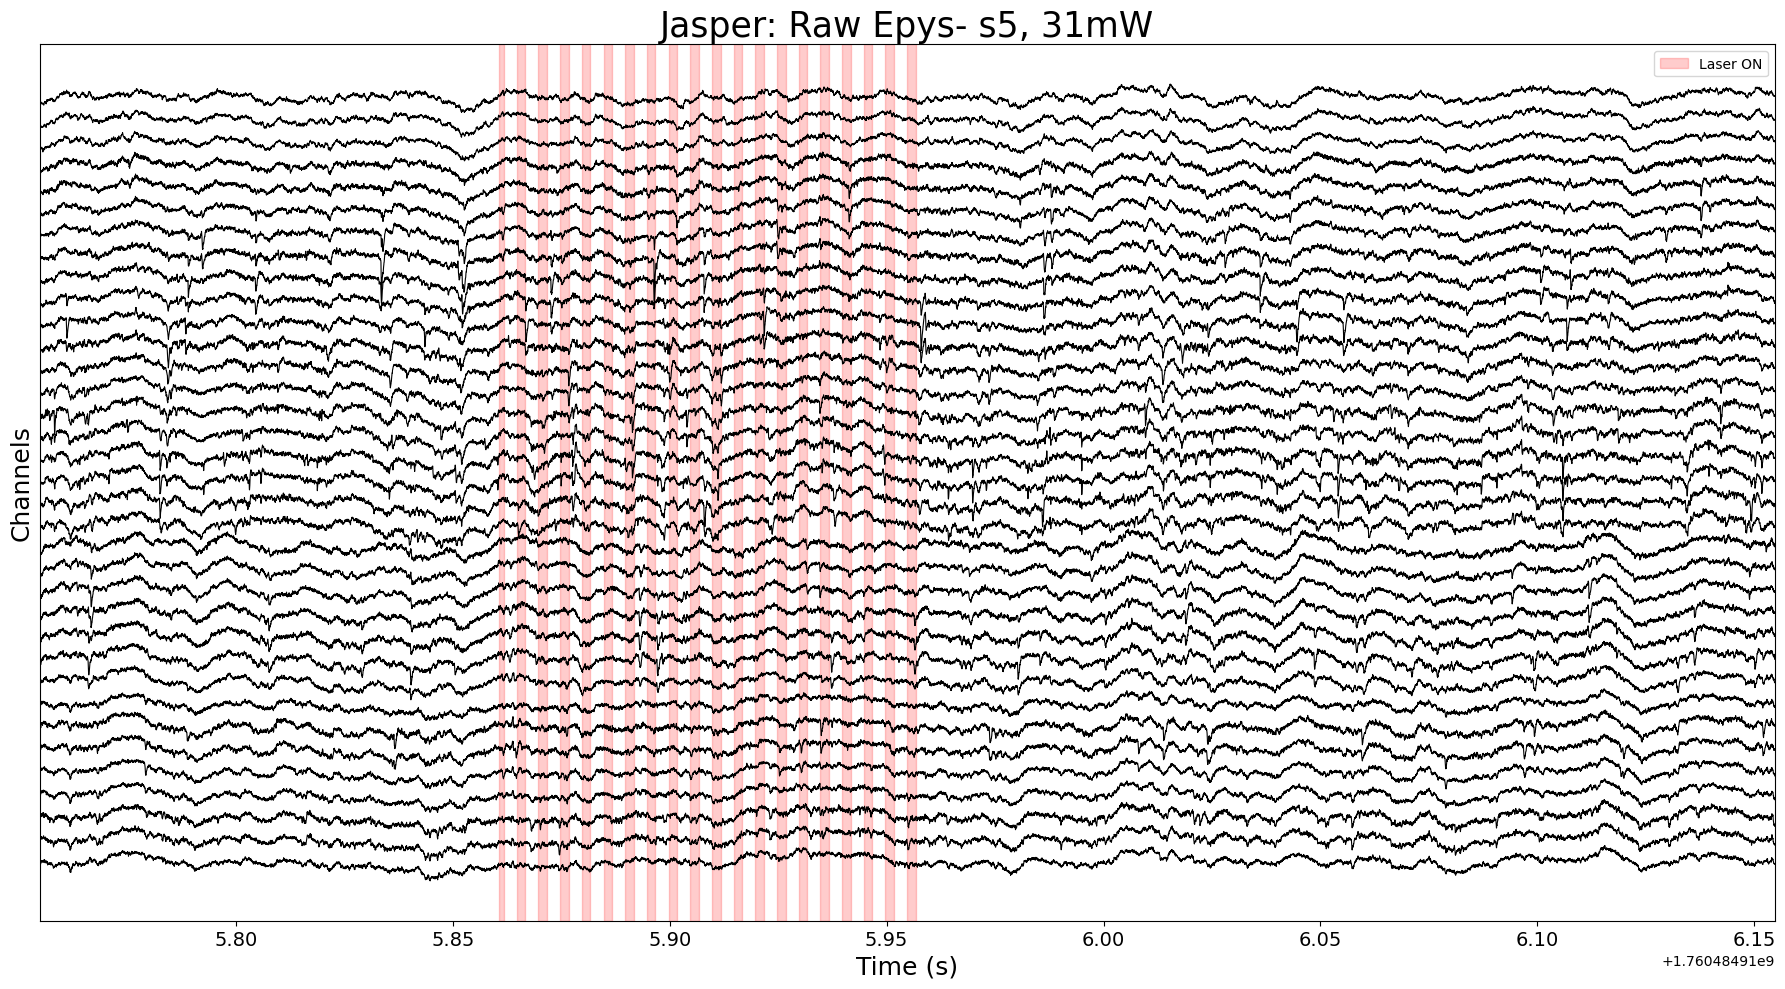

In [11]:
# Define time window around a specific laser event
start_time = first_laser_on_times[50] - 0.2
stop_time  = first_laser_on_times[50] + 0.2

# Extract time window
mask = (total_timestamps > start_time) & (total_timestamps <= stop_time)
timestamps = total_timestamps[mask]
ephys = nwbf.acquisition['e-series'].data[mask, :]

# this is to plot the raw ephys trace

filtered_ephys = ephys

# only plotting channels with signal
channels_to_plot = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
                    100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]

# Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# Calculate appropriate offset based on data range
signal_range = np.std(filtered_ephys[:, channels_to_plot]) * 4  # 4 standard deviations
offset = signal_range  # automatic spacing based on signal amplitude

# Plot each channel
for i, channel_idx in enumerate(channels_to_plot):
    ax.plot(
        timestamps,
        filtered_ephys[:, channel_idx] - i * offset,
        color='black',
        linewidth=0.8,
        # label=f'Ch {channel_idx}' if i % 5 == 0 else ''  # label every 5th channel
    )

# Highlight laser stimulation periods
laser_mask = (laser_timestamps_epoch >= start_time) & (laser_timestamps_epoch <= stop_time)
label_added = False

for i in range(len(laser_data_epoch) - 1):
    if laser_data_epoch[i] == 1 and laser_mask[i]:
        # ax.axvspan(laser_timestamps_epoch[i],
        #            laser_timestamps_epoch[i + 1],
        #            color='red', alpha=0.2, zorder=0, label = 'Laser ON')
    # if laser_data_epoch[i] == 1 and laser_mask[i]:
        if not label_added:
            ax.axvspan(laser_timestamps_epoch[i],
                       laser_timestamps_epoch[i + 1],
                       color='red', alpha=0.2, zorder=0, label='Laser ON')
            label_added = True  # Set the flag to True after adding the label
        else:
            ax.axvspan(laser_timestamps_epoch[i],
                       laser_timestamps_epoch[i + 1],
                       color='red', alpha=0.2, zorder=0)


# Add channel labels on the right side
# for i, channel_idx in enumerate(channels_to_plot):
#     ax.text(stop_time + 0.01, -i * offset, f'{channel_idx}',
#             va='center', fontsize=8)

# Styling
ax.set_xlim([start_time, stop_time])
ax.set_xlabel("Time (s)", fontsize=18)
ax.set_ylabel("Channels", fontsize=18)
ax.set_title("Jasper: Raw Epys- s5, 31mW", fontsize=25)
ax.set_yticks([])  # hides y-axis ticks
ax.set_facecolor('white')
ax.tick_params(axis='x', labelsize=14)
ax.legend(loc='upper right')
# ax.spines['left'].set_visible(False)  # cleaner look

# Add scale bar
# scalebar_y = -len(channels_to_plot) * offset * 1.1
# ax.plot([start_time + 0.05, start_time + 0.15], [scalebar_y, scalebar_y],
#         'k-', linewidth=2)
# ax.text(start_time + 0.1, scalebar_y - offset*0.5, '100 ms',
#         ha='center', fontsize=10)

plt.tight_layout()
plt.show()

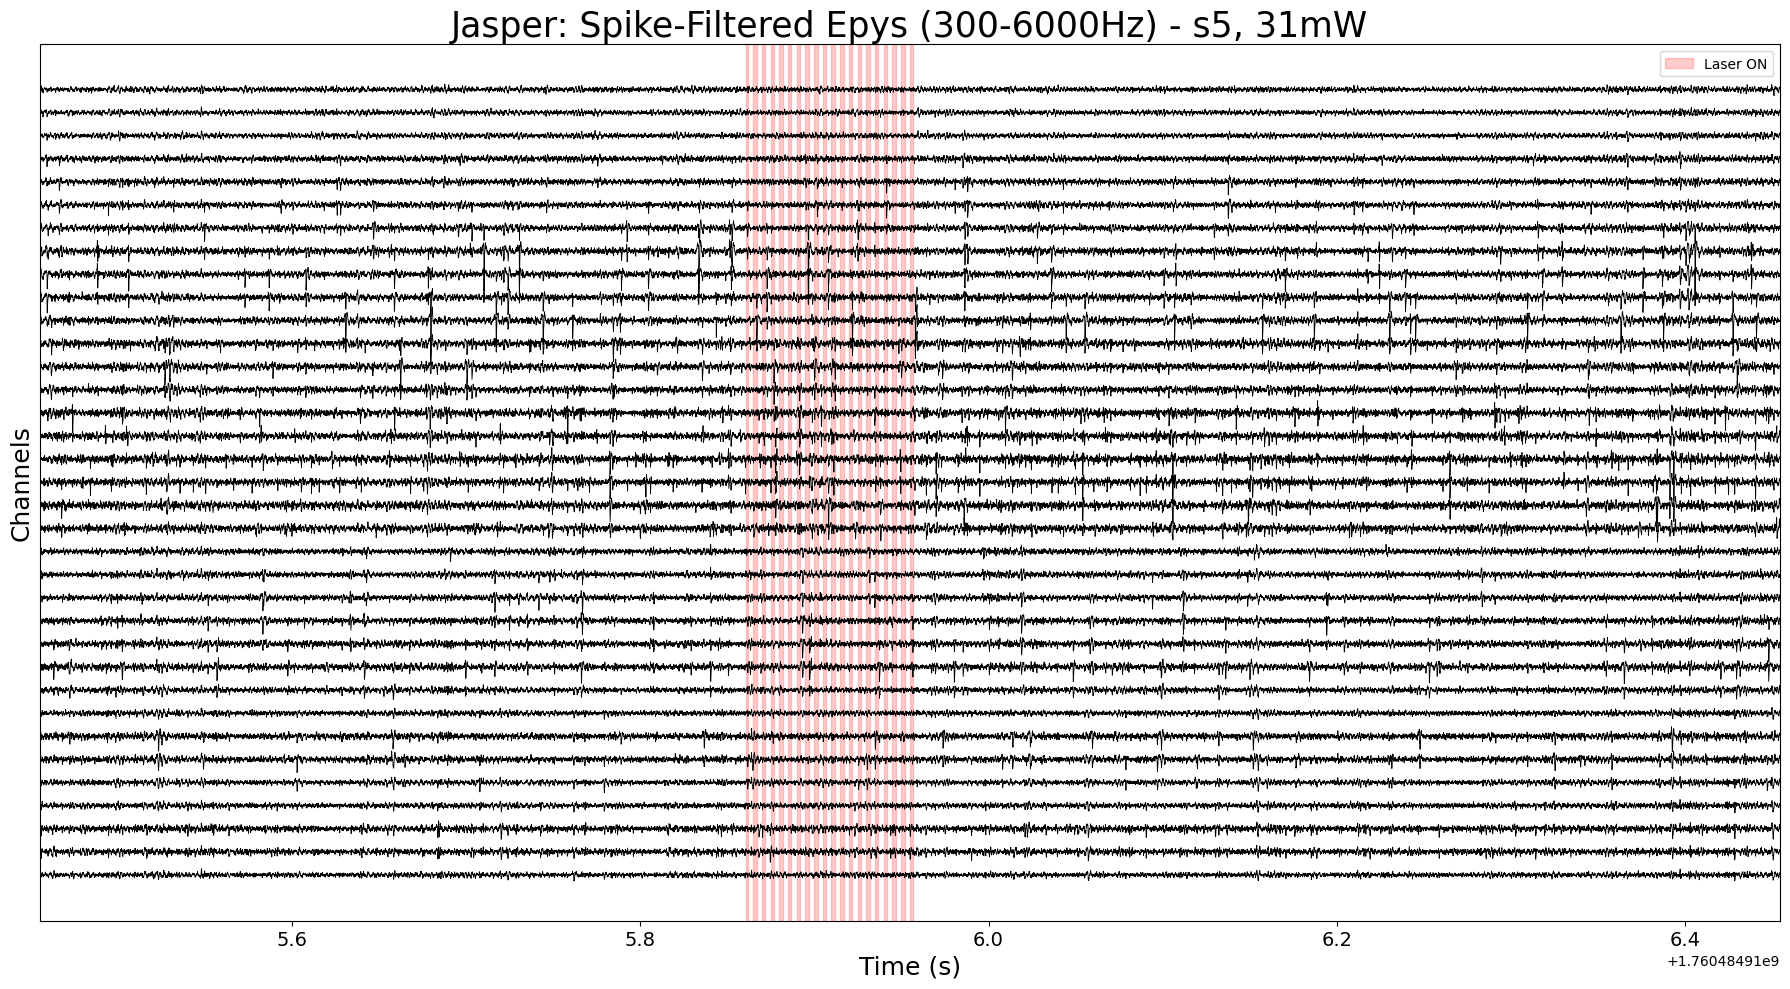

In [12]:
# Define time window around a specific laser event
start_time = first_laser_on_times[50] - 0.5
stop_time  = first_laser_on_times[50] + 0.5

# Extract time window
timestamps = total_timestamps[(total_timestamps > start_time) & (total_timestamps <= stop_time)]
ephys = nwbf.acquisition['e-series'].data[(total_timestamps > start_time) & (total_timestamps <= stop_time), :]

lowcut = 300
highcut = 6000

# Bandpass filter
filtered_ephys = apply_bandpass_filter(ephys, lowcut, highcut, fs)
label_added = False

# Create figure
fig, ax = plt.subplots(figsize=(18, 10))

offset = 200  # increased spacing to make traces more visible

# Plot each channel
for i, channel_idx in enumerate(channels_to_plot):
    ax.plot(
        timestamps,
        filtered_ephys[:, channel_idx] - i * offset,
        color='black',
        linewidth=0.6
    )

# Highlight laser stimulation periods
for i in range(len(laser_data_epoch) - 1):
    if laser_data_epoch[i] == 1 and laser_mask[i]:
        # ax.axvspan(laser_timestamps_epoch[i],
        #            laser_timestamps_epoch[i + 1],
        #            color='red', alpha=0.2, zorder=0, label = 'Laser ON')
    # if laser_data_epoch[i] == 1 and laser_mask[i]:
        if not label_added:
            ax.axvspan(laser_timestamps_epoch[i],
                       laser_timestamps_epoch[i + 1],
                       color='red', alpha=0.2, zorder=0, label='Laser ON')
            label_added = True  # Set the flag to True after adding the label
        else:
            ax.axvspan(laser_timestamps_epoch[i],
                       laser_timestamps_epoch[i + 1],
                       color='red', alpha=0.2, zorder=0)

# Styling
ax.set_xlim([start_time, stop_time])
ax.set_xlabel("Time (s)", fontsize = 18)
ax.set_ylabel("Channels", fontsize = 18)
ax.set_title("Jasper: Spike-Filtered Epys (300-6000Hz) - s5, 31mW", fontsize = 25)
ax.set_yticks([])
ax.set_facecolor('white')
ax.tick_params(axis='x', labelsize=14)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [94]:
# merge the 100ms duty cycle, this takes awhile

gap_thresh = 0.01  # 10ms maximum gap to merge pulses
highcut = 400
lowcut = 0.5
# Peri-laser window for averaging
pre_time = 0.2     # seconds before laser onset
post_time = 0.2   # seconds after laser onset

# vertical offset for plotting
offset = 10

# filtered_full = apply_bandpass_filter(
#     nwbf.acquisition['e-series'].data,
#     lowcut, highcut, fs
# )


# function for merging the laser pulses
def merge_laser_pulses(laser_data_epoch, laser_timestamps_epoch, gap_thresh=0.005):
    raw_intervals = []
    for i in range(len(laser_data_epoch)-1):
        if laser_data_epoch[i] == 1:
            start = laser_timestamps_epoch[i]
            stop  = laser_timestamps_epoch[i+1]
            if stop > start:
                raw_intervals.append((start, stop))
    # Merge close pulses
    merged = []
    for start, stop in raw_intervals:
        if not merged:
            merged.append([start, stop])
        else:
            prev_start, prev_stop = merged[-1]
            if start - prev_stop <= gap_thresh:
                merged[-1][1] = stop
            else:
                merged.append([start, stop])
    return [tuple(x) for x in merged]


laser_on_intervals = merge_laser_pulses(laser_data_epoch, laser_timestamps_epoch, gap_thresh)
print(f"Merged laser intervals: {len(laser_on_intervals)}")


Merged laser intervals: 917


In [96]:
avg_traces = np.zeros((n_samples, len(channels_to_plot)))  # (12000, 35)
count = 0
fs = 1000

for start, stop in laser_on_intervals:
    onset = start
    start_t = onset - pre_time
    stop_t  = onset + post_time

    # Bounds check: ensure the time window is within available timestamps
    if start_t < timestamps[0] or stop_t > timestamps[-1]:
        continue

    # Find the nearest indices in timestamps
    idx_start = np.searchsorted(timestamps, start_t, side='left')
    idx_stop  = np.searchsorted(timestamps, stop_t, side='right')  # exclusive

    # Ensure idx_stop is within bounds
    if idx_stop > len(timestamps):
        idx_stop = len(timestamps)

    # Extract the segment of filtered ephys data
    segment = ephys[idx_start:idx_stop, :]

    # If the segment size doesn't match the expected n_samples, adjust idx_stop
    segment_length = segment.shape[0]
    if segment_length != n_samples:
        print(f"Warning: Segment length mismatch. Expected {n_samples}, got {segment_length}. Adjusting idx_stop.")
        if segment_length < n_samples:
            # If the segment is too short, adjust the stop index
            idx_stop += (n_samples - segment_length)
            segment = ephys[idx_start:idx_stop, :]  # Re-extract the segment with adjusted idx_stop
        elif segment_length > n_samples:
            # If the segment is too long, truncate it
            idx_stop -= (segment_length - n_samples)
            segment = ephys[idx_start:idx_stop, :]  # Re-extract the segment with adjusted idx_stop

    # Make sure the segment has the correct number of samples (n_samples)
    if segment.shape[0] != n_samples:
        print(f"Error: Segment still doesn't match n_samples. Skipping this interval.")
        continue

    # Accumulate the segment
    avg_traces += segment
    count += 1

if count == 0:
    raise RuntimeError("No valid laser epochs found.")

# Averaging over all valid laser epochs
avg_traces /= count


Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still doesn't match n_samples. Skipping this interval.
Error: Segment still

In [97]:
avg_traces = np.zeros((n_samples, len(channels_to_plot)))
count = 0
fs = 1000

for start, stop in laser_on_intervals:
    onset = start
    start_t = onset - pre_time
    stop_t  = onset + post_time

    # bounds check
    if start_t < timestamps[0] or stop_t > timestamps[-1]:
        continue

    # Find the nearest indices in timestamps
    idx_start = np.searchsorted(timestamps, start_t, side='left')
    idx_stop  = np.searchsorted(timestamps, stop_t, side='right')  # exclusive

    # If idx_stop goes beyond the available data, skip this interval
    if idx_stop > len(timestamps):
        continue

    # Extract the segment of filtered ephys data
    segment = ephys[idx_start:idx_stop, :]

    # Accumulate
    avg_traces += segment
    count += 1

if count == 0:
    raise RuntimeError("No valid laser epochs found.")

# Averaging over all valid laser epochs
avg_traces /= count


ValueError: operands could not be broadcast together with shapes (12000,35) (400,35) (12000,35) 

In [90]:
segment

array([[  5,   5,  13, ..., -17, -20, -11],
       [ 32,  35,  39, ..., -20, -27, -20],
       [ 28,  25,  25, ..., -29, -35, -42],
       ...,
       [-40, -29, -29, ...,   4,  13,   4],
       [  6,   9,   2, ...,  25,  28,  23],
       [  4,   6,  -7, ...,   6,   9,   6]], dtype=int16)

In [91]:
ephys
timestamps = df_subset.index.to_numpy()  # (N_samples,)

In [92]:
# sampling rate
fs = 30000
print(f"Sampling rate: {fs} Hz")

# number of samples in peri-laser window
n_samples = int(round((pre_time + post_time) * fs))
print(f"Samples per epoch: {n_samples}")

avg_traces = np.zeros((n_samples, len(channels_to_plot)))
count = 0

# loop through merged laser intervals
for start, stop in laser_on_intervals:
    onset = start
    start_t = onset - pre_time
    stop_t  = onset + post_time

    # Skip if window goes out of bounds
    if start_t < total_timestamps[0] or stop_t > total_timestamps[-1]:
        continue

    # Find nearest indices in total_timestamps
    idx_start = np.searchsorted(total_timestamps, start_t, side='left')
    idx_stop  = idx_start + n_samples
    if idx_stop > len(total_timestamps):
        continue

    # Extract ephys segment
    # ephys_segment = nwbf.acquisition['e-series'].data[idx_start:idx_stop, :]
    # filtered_segment = apply_bandpass_filter(ephys_segment, lowcut, highcut, fs)
    ephys_segment = filtered_full[idx_start:idx_stop, :]

    # Accumulate
    avg_traces += ephys[:, channels_to_plot] #filtered_segment[:, channels_to_plot]
    count += 1

if count == 0:
    raise RuntimeError("No valid laser epochs found in this window length.")

avg_traces /= count
print(f"Averaged over {count} valid laser epochs.")

Sampling rate: 30000 Hz
Samples per epoch: 12000


NameError: name 'filtered_full' is not defined

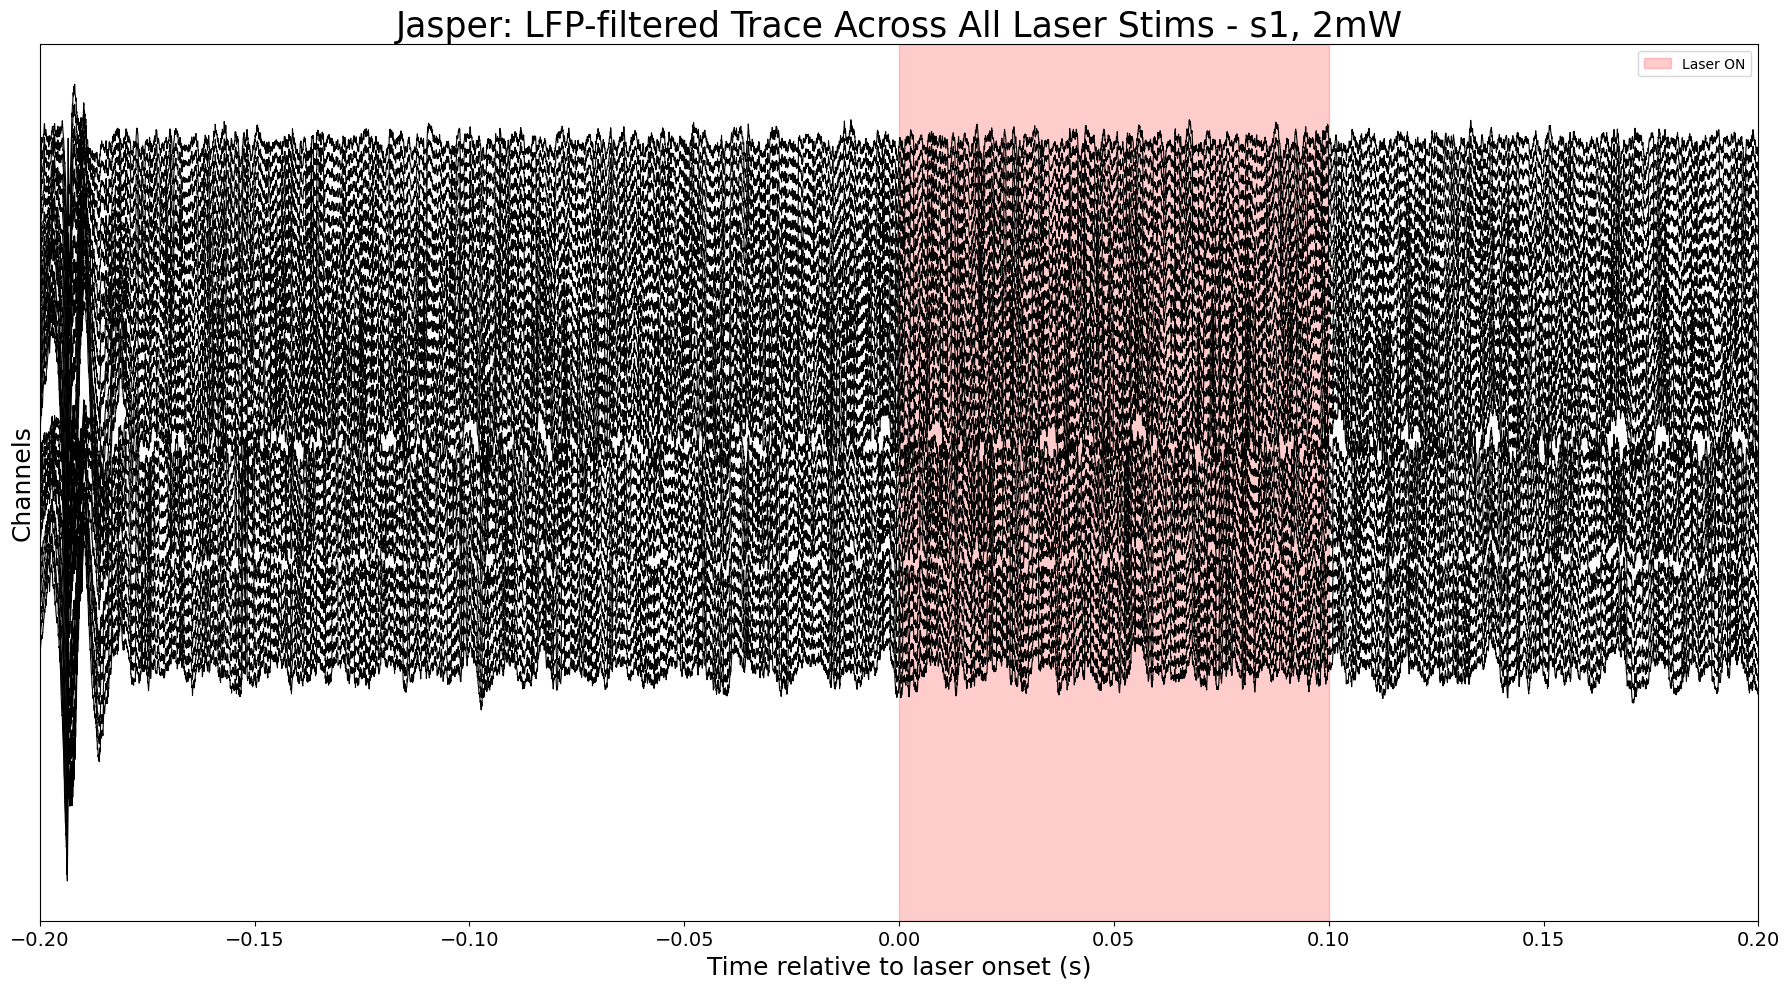

In [89]:
# time axis relative to laser onset
offset = np.std(avg_traces)*1
t_rel = np.linspace(-pre_time, post_time, n_samples)

fig, ax = plt.subplots(figsize=(18, 10))

for i, channel_idx in enumerate(channels_to_plot):
    ax.plot(
        t_rel,
        avg_traces[:, i] - i * offset,
        color='black',
        linewidth=0.8
    )

# Highlight laser ON window (0 to duration of merged train, approx 100ms)
ax.axvspan(0,0.1, color='red', alpha=0.2, label='Laser ON')

ax.set_xlim([-pre_time, post_time])
ax.set_xlabel("Time relative to laser onset (s)", fontsize = 18)
ax.set_ylabel("Channels", fontsize = 18)
ax.set_title("Jasper: LFP-filtered Trace Across All Laser Stims - s1, 2mW",fontsize=25)
ax.set_yticks([])
ax.set_facecolor('white')
ax.legend(loc='upper right')
ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()

In [ ]:
lowcut = 0.5
highcut = 400
pretime = 0.2

avg_traces = np.zeros((n_samples, len(channels_to_plot)))
count = 0
# Filter the full continuous signal once
filtered_full = apply_bandpass_filter(
    nwbf.acquisition['e-series'].data,
    lowcut, highcut, fs
)

# Then slice epochs from filtered_full



# loop through merged laser intervals
for start, stop in laser_on_intervals:
    onset = start
    start_t = onset - pre_time
    stop_t  = onset + post_time

    # Skip if window goes out of bounds
    if start_t < total_timestamps[0] or stop_t > total_timestamps[-1]:
        continue

    # Find nearest indices in total_timestamps
    idx_start = np.searchsorted(total_timestamps, start_t, side='left')
    idx_stop  = idx_start + n_samples
    if idx_stop > len(total_timestamps):
        continue

    # Extract ephys segment
    ephys_segment = filtered_full[idx_start:idx_stop, :]

    # Accumulate
    avg_traces += filtered_segment[:, channels_to_plot]
    count += 1

if count == 0:
    raise RuntimeError("No valid laser epochs found in this window length.")

avg_traces /= count
print(f"Averaged over {count} valid laser epochs.")

Averaged over 1892 valid laser epochs.


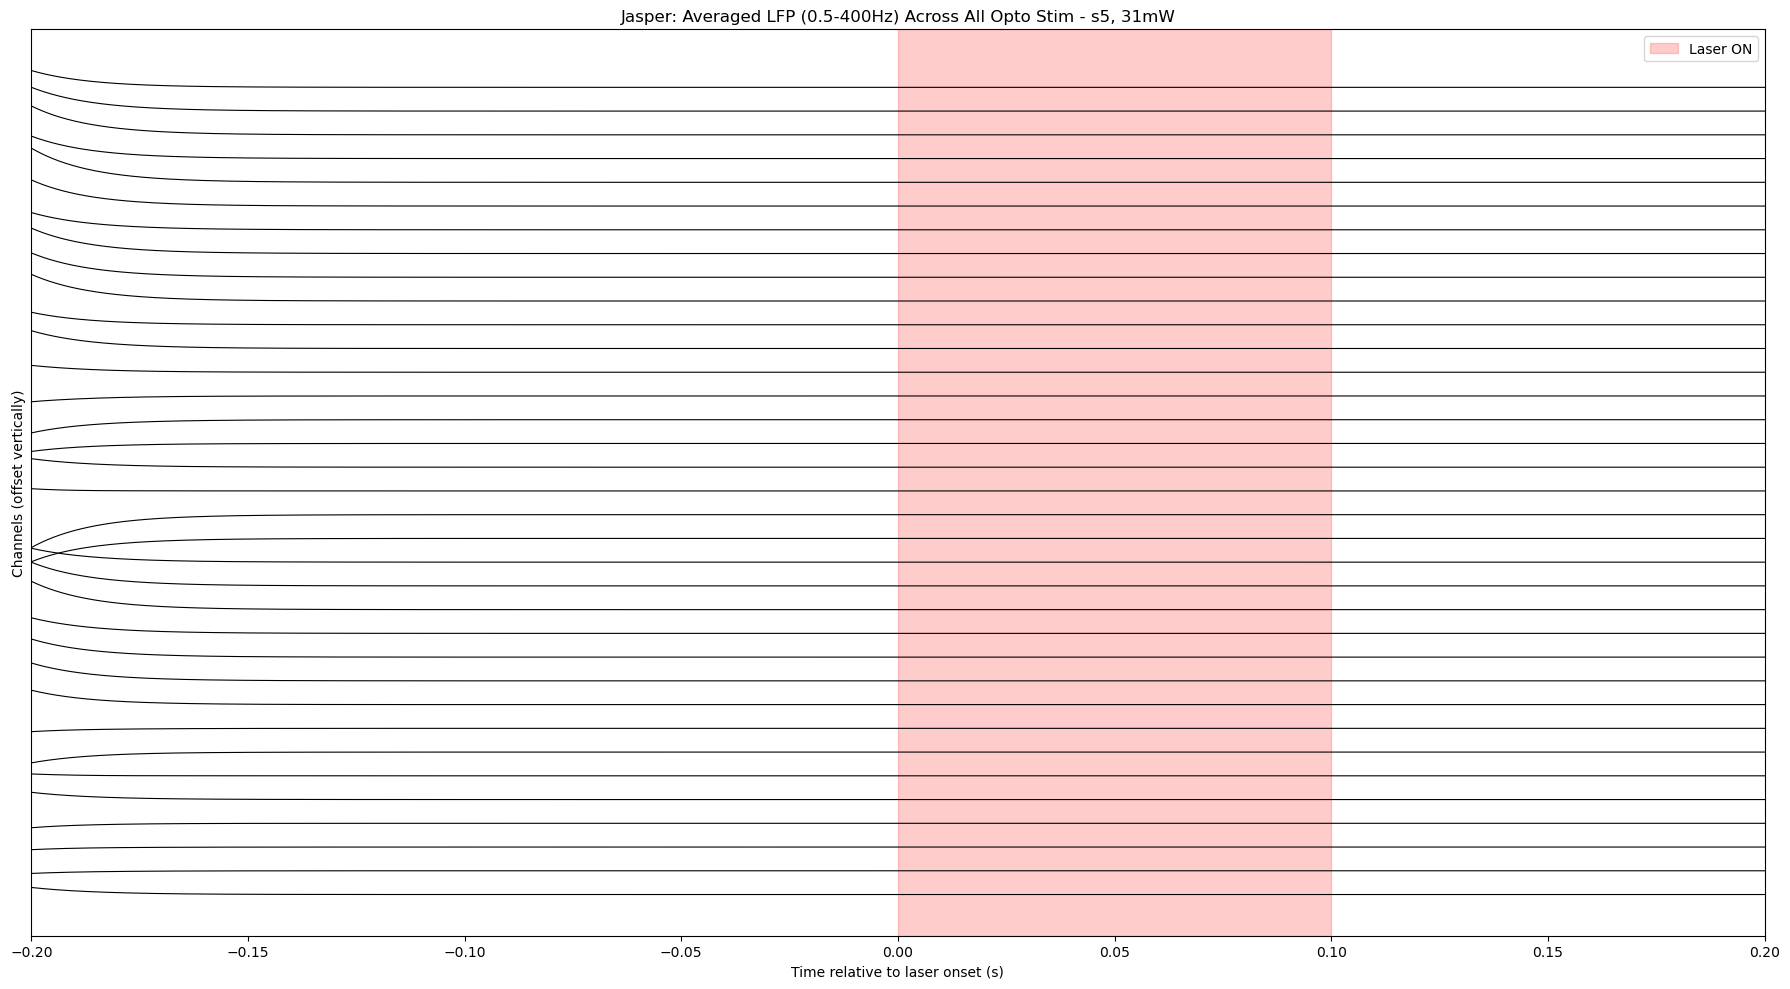

In [21]:
# LFP plot
fig, ax = plt.subplots(figsize=(18, 10))
offset = np.std(avg_traces)*10

for i, channel_idx in enumerate(channels_to_plot):
    ax.plot(
        t_rel,
        avg_traces[:, i] - i * offset,
        color='black',
        linewidth=0.8
    )

# Highlight laser ON window (0 to duration of merged train, approx 100ms)
ax.axvspan(0, 0.1, color='red', alpha=0.2, label='Laser ON')

ax.set_xlim([-pre_time, post_time])
ax.set_xlabel("Time relative to laser onset (s)")
ax.set_ylabel("Channels (offset vertically)")
ax.set_title("Jasper: Averaged LFP (0.5-400Hz) Across All Opto Stim - s5, 31mW")
ax.set_yticks([])
ax.set_facecolor('white')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

Averaged over 1892 valid laser epochs.


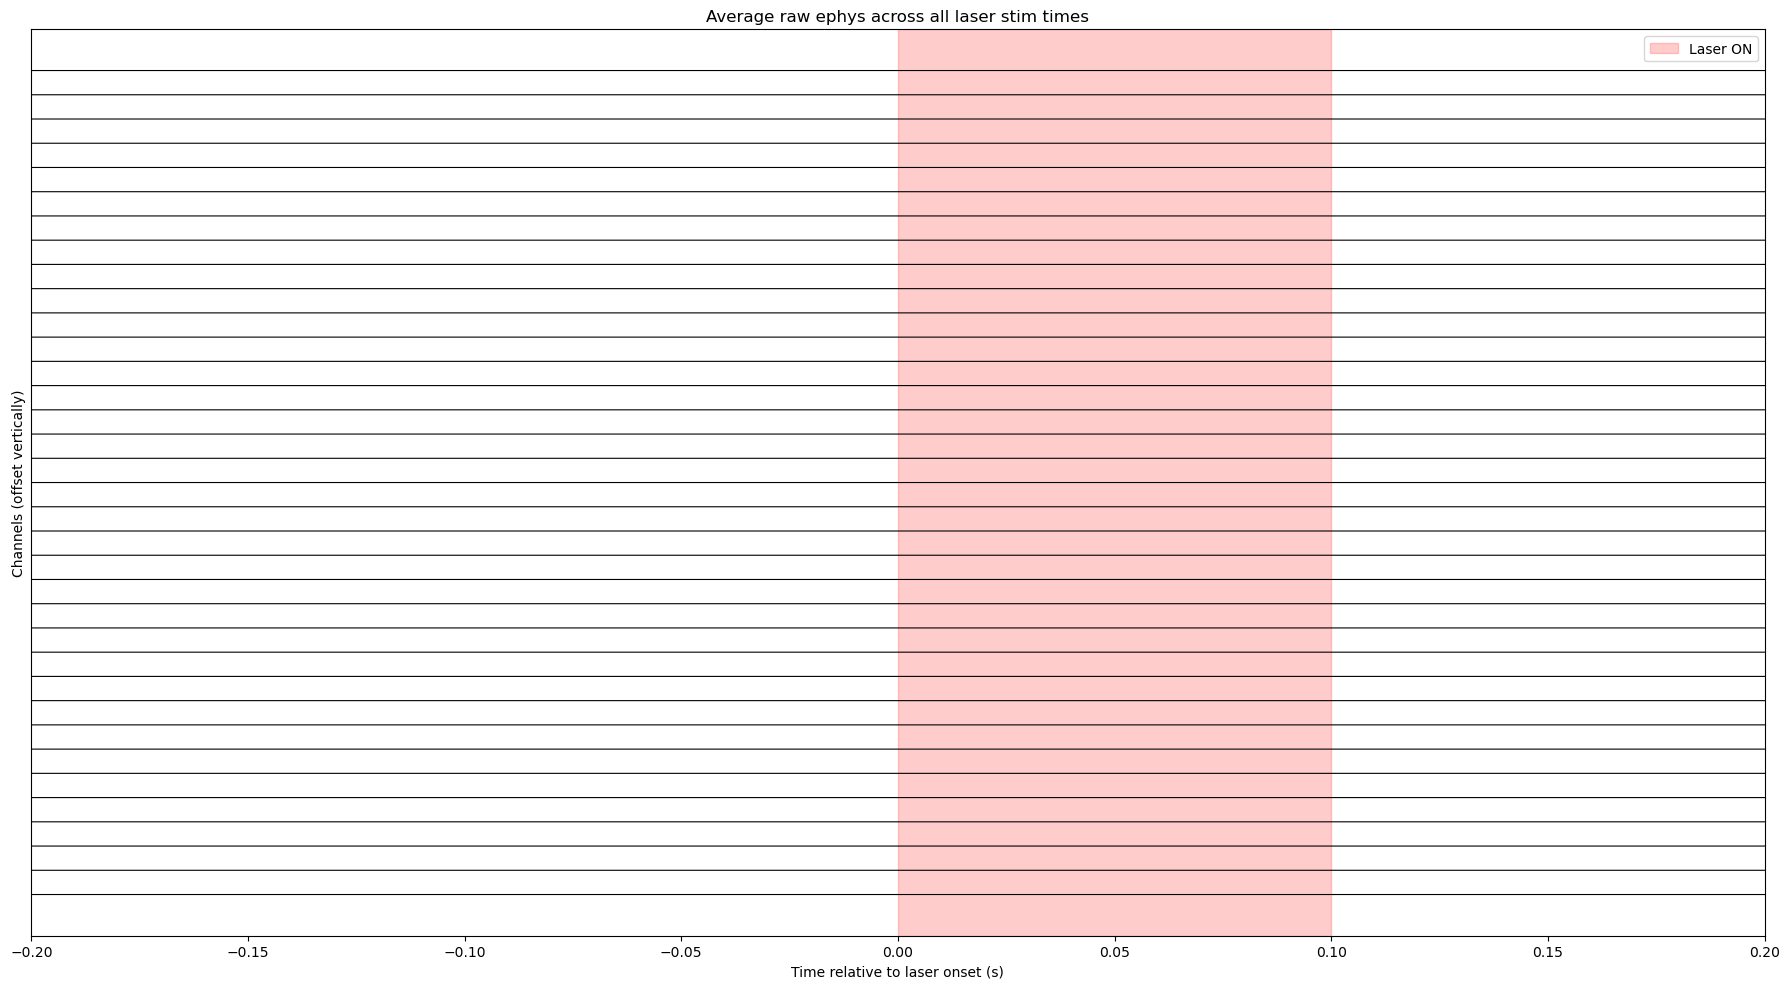

In [ ]:
avg_traces = np.zeros((n_samples, len(channels_to_plot)))
count = 0

# loop through merged laser intervals
for start, stop in laser_on_intervals:
    onset = start
    start_t = onset - pre_time
    stop_t  = onset + post_time

    # Skip if window goes out of bounds
    if start_t < total_timestamps[0] or stop_t > total_timestamps[-1]:
        continue

    # Find nearest indices in total_timestamps
    idx_start = np.searchsorted(total_timestamps, start_t, side='left')
    idx_stop  = idx_start + n_samples
    if idx_stop > len(total_timestamps):
        continue

    # Extract ephys segment
    ephys_segment = nwbf.acquisition['e-series'].data[idx_start:idx_stop, :]
    filtered_segment = ephys_segment # keeping this raw and unfiltered

    # Accumulate
    avg_traces += filtered_segment[:, channels_to_plot]
    count += 1

if count == 0:
    raise RuntimeError("No valid laser epochs found in this window length.")

avg_traces /= count
print(f"Averaged over {count} valid laser epochs.")

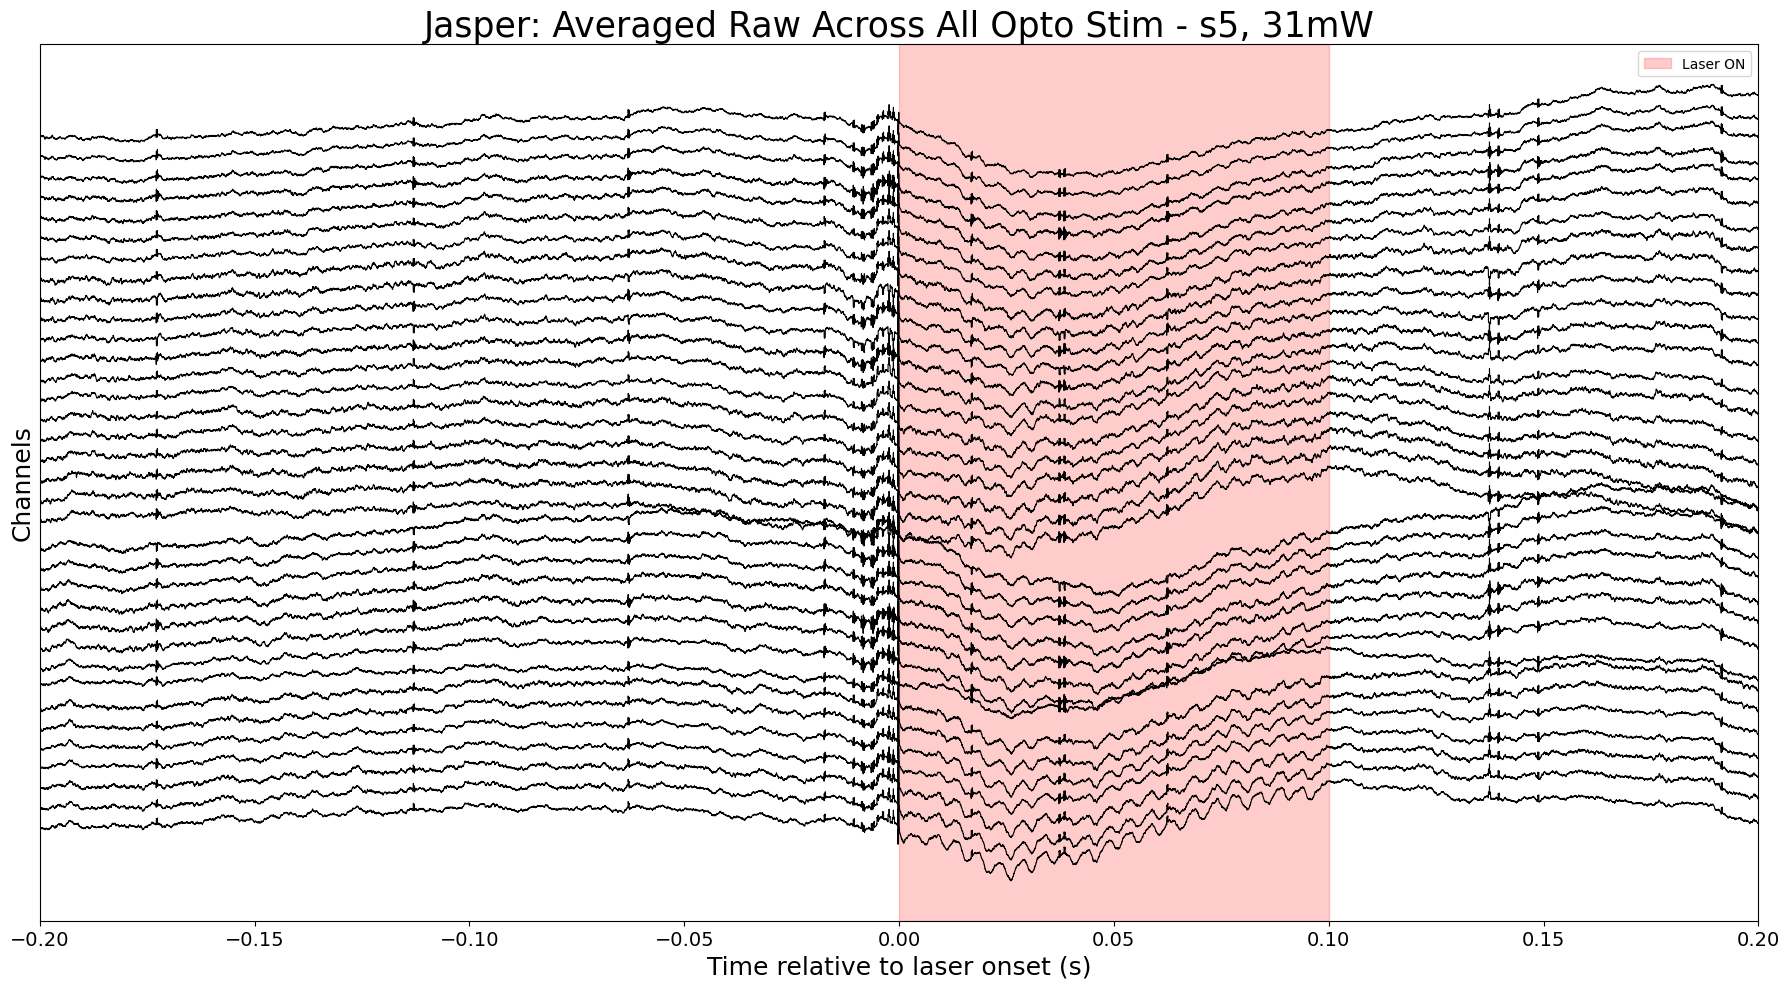

In [ ]:
pre_time = 0.2
offset = np.std(avg_traces)
fig, ax = plt.subplots(figsize=(18, 10))

for i, channel_idx in enumerate(channels_to_plot):
    ax.plot(
        t_rel,
        avg_traces[:, i] - i * offset,
        color='black',
        linewidth=0.8
    )

# Highlight laser ON window (0 to duration of merged train, approx 100ms)
ax.axvspan(0, 0.1, color='red', alpha=0.2, label='Laser ON')

ax.set_xlim([-pre_time, post_time])
ax.set_xlabel("Time relative to laser onset (s)", fontsize = 18)
ax.set_ylabel("Channels", fontsize = 18)
ax.set_title("Jasper: Averaged Raw Across All Opto Stim - s5, 31mW", fontsize = 25)
ax.set_yticks([])
ax.tick_params(axis='x', labelsize=14)
ax.set_facecolor('white')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [32]:
len(laser_on_intervals)

917

Merged laser ON epochs: 917
✅ Found 917 valid laser epochs with baseline
Top channels by absolute percent change:
     56 |   -80.39% | 2.62e-19 | True
     47 |   -80.34% | 2.66e-19 | True
     36 |   -79.26% | 2.62e-19 | True
     40 |   -79.26% | 2.61e-19 | True
     41 |   -78.88% | 2.53e-19 | True
     37 |   -78.67% | 2.58e-19 | True
     57 |   -78.16% | 2.45e-19 | True
     53 |   -78.16% | 2.82e-19 | True
     52 |   -78.11% | 2.83e-19 | True
     42 |   -76.86% | 2.43e-19 | True


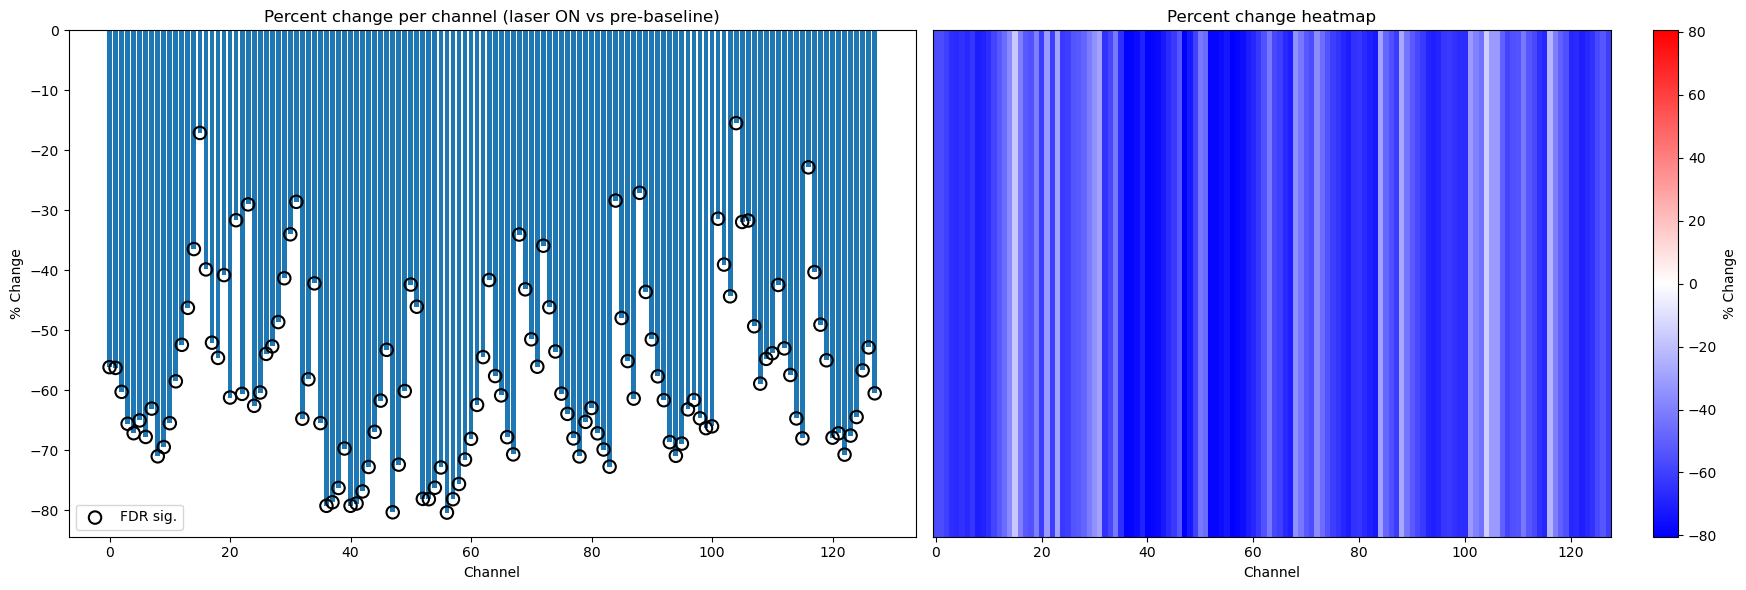

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
from statsmodels.stats.multitest import multipletests

# ==============================================================
# PARAMETERS
# ==============================================================
pre_window = 0.05    # seconds for baseline
metric = 'rms'       # 'rms', 'mean_abs', 'var', or 'bandpower'
band = (lowcut, highcut)  # Hz, used only for 'bandpower'
alpha = 0.05         # FDR correction level
gap_thresh = 0.01    # merge laser pulses ≤10ms apart

# --------------------------------------------------------------
# Helper: mask for time window
# --------------------------------------------------------------
def epoch_mask(timestamps, t0, t1):
    return (timestamps >= t0) & (timestamps < t1)

# ==============================================================
# 1️⃣ Merge laser pulses into single ~100ms trains
# ==============================================================
laser_on_intervals = []
for i in range(len(laser_data_epoch)-1):
    if laser_data_epoch[i]==1:
        start = laser_timestamps_epoch[i]
        stop = laser_timestamps_epoch[i+1]
        if stop>start:
            laser_on_intervals.append((start, stop))

# Merge pulses separated by ≤ gap_thresh
merged = []
for start, stop in laser_on_intervals:
    if not merged:
        merged.append([start, stop])
    else:
        prev_start, prev_stop = merged[-1]
        if start - prev_stop <= gap_thresh:
            merged[-1][1] = stop
        else:
            merged.append([start, stop])
laser_on_intervals = [tuple(x) for x in merged]
print(f"Merged laser ON epochs: {len(laser_on_intervals)}")

# ==============================================================
# 2️⃣ Use full timestamps and filtered ephys
# ==============================================================
timestamps = total_timestamps.copy()   # full recording
ephys = nwbf.acquisition['e-series'].data
fs = 29999
filtered_ephys = apply_bandpass_filter(ephys, lowcut, highcut, fs)
n_channels = filtered_ephys.shape[1]

# ==============================================================
# 3️⃣ Keep valid epochs with pre-baseline
# ==============================================================
valid_epochs = []
for e_idx, (on_start, on_stop) in enumerate(laser_on_intervals):
    pre_start = max(timestamps[0], on_start - pre_window)
    pre_stop  = on_start

    on_mask = epoch_mask(timestamps, on_start, on_stop)
    pre_mask = epoch_mask(timestamps, pre_start, pre_stop)

    if on_mask.sum() < 5 or pre_mask.sum() < 5:
        continue

    valid_epochs.append((on_start, on_stop, pre_start, pre_stop))

print(f"✅ Found {len(valid_epochs)} valid laser epochs with baseline")
if len(valid_epochs)==0:
    raise RuntimeError("No valid laser epochs found.")

# ==============================================================
# 4️⃣ Compute metric
# ==============================================================
on_values = []
pre_values = []

for e_idx, (on_start, on_stop, pre_start, pre_stop) in enumerate(valid_epochs):
    on_mask = epoch_mask(timestamps, on_start, on_stop)
    pre_mask = epoch_mask(timestamps, pre_start, pre_stop)
    seg_on = filtered_ephys[on_mask, :]
    seg_pre = filtered_ephys[pre_mask, :]

    if metric == 'rms':
        on_values.append(np.sqrt(np.mean(seg_on**2, axis=0)))
        pre_values.append(np.sqrt(np.mean(seg_pre**2, axis=0)))
    elif metric == 'mean_abs':
        on_values.append(np.mean(np.abs(seg_on), axis=0))
        pre_values.append(np.mean(np.abs(seg_pre), axis=0))
    elif metric == 'var':
        on_values.append(np.var(seg_on, axis=0))
        pre_values.append(np.var(seg_pre, axis=0))
    elif metric == 'bandpower':
        f_on, P_on = signal.welch(seg_on, fs=fs, axis=0, nperseg=int(fs))
        f_pre, P_pre = signal.welch(seg_pre, fs=fs, axis=0, nperseg=int(fs))
        idx_on = (f_on >= band[0]) & (f_on <= band[1])
        idx_pre = (f_pre >= band[0]) & (f_pre <= band[1])
        on_values.append(np.trapz(P_on[idx_on,:], f_on[idx_on], axis=0))
        pre_values.append(np.trapz(P_pre[idx_pre,:], f_pre[idx_pre], axis=0))
    else:
        raise ValueError("Unknown metric")

on_values = np.vstack(on_values)
pre_values = np.vstack(pre_values)

# ==============================================================
# 5️⃣ Compute statistics
# ==============================================================
mean_on = np.mean(on_values, axis=0)
mean_pre = np.mean(pre_values, axis=0)
percent_change = (mean_on - mean_pre) / (mean_pre + 1e-12) * 100

p_values = np.ones(n_channels)
for ch in range(n_channels):
    try:
        p_values[ch] = stats.ttest_rel(on_values[:,ch], pre_values[:,ch], nan_policy='omit')[1]
    except Exception:
        p_values[ch] = 1.0

rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

# ==============================================================
# 6️⃣ Print summary
# ==============================================================
top_idx = np.argsort(np.abs(percent_change))[::-1][:10]
print("Top channels by absolute percent change:")
for i in top_idx:
    print(f"{i:7d} | {percent_change[i]:8.2f}% | {pvals_corrected[i]:8.3g} | {bool(rejected[i])}")

# ==============================================================
# 7️⃣ Plot
# ==============================================================
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Bar plot
axes[0].bar(np.arange(n_channels), percent_change)
axes[0].scatter(np.where(rejected)[0], percent_change[rejected],
                facecolors='none', edgecolors='k', s=80, linewidths=1.5, label='FDR sig.')
axes[0].axhline(0, color='k', lw=0.7)
axes[0].set_title("Percent change per channel (laser ON vs pre-baseline)")
axes[0].set_xlabel("Channel")
axes[0].set_ylabel("% Change")
axes[0].legend()

# Heatmap
im = axes[1].imshow(percent_change[np.newaxis,:],
                    aspect='auto', cmap='bwr',
                    vmin=-np.max(np.abs(percent_change)),
                    vmax=np.max(np.abs(percent_change)))
axes[1].set_title("Percent change heatmap")
axes[1].set_yticks([])
axes[1].set_xlabel("Channel")
plt.colorbar(im, ax=axes[1], orientation='vertical', label='% Change')

plt.tight_layout()
plt.show()


Merged laser ON epochs: 917
Analyzing 35 channels of interest: [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114]
✅ Found 917 valid laser epochs with baseline

Channel    | % Change     | p-value      | Significant
------------------------------------------------------------
Top channels by absolute percent change:
100        |      -46.89% |    4.38e-15 | True
114        |      -45.64% |    2.96e-15 | True
24         |      -42.83% |    2.96e-15 | True
20         |      -41.28% |    2.96e-15 | True
22         |      -41.04% |       5e-15 | True
25         |      -40.49% |    2.96e-15 | True
108        |      -39.03% |    2.96e-15 | True
113        |      -37.79% |    2.96e-15 | True
109        |      -34.89% |    2.96e-15 | True
18         |      -34.68% |       5e-15 | True


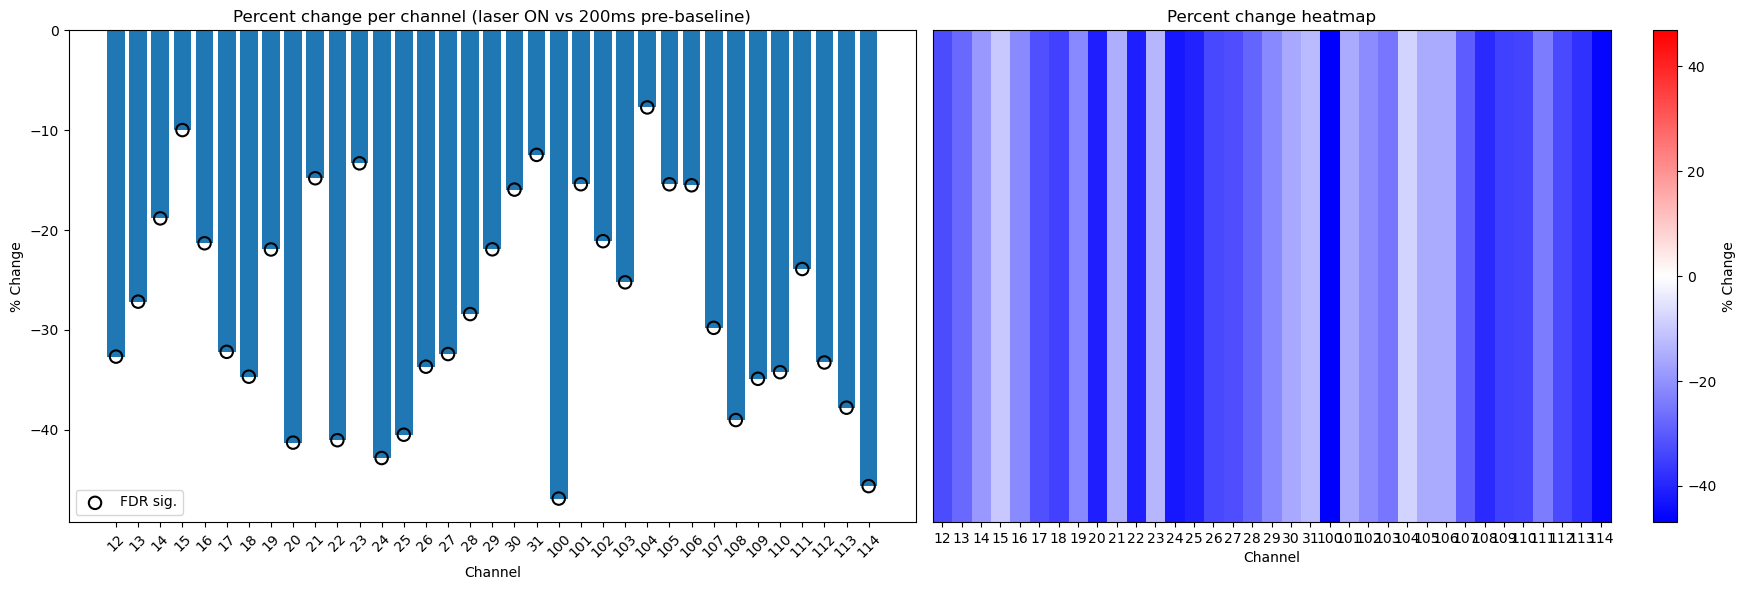

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
from statsmodels.stats.multitest import multipletests

# ==============================================================
# PARAMETERS
# ==============================================================
pre_window = 0.2     # seconds for baseline (changed to 200ms)
metric = 'rms'       # 'rms', 'mean_abs', 'var', or 'bandpower'
band = (lowcut, highcut)  # Hz, used only for 'bandpower'
alpha = 0.05         # FDR correction level
gap_thresh = 0.01    # merge laser pulses ≤10ms apart

# CHANNELS OF INTEREST - Set to None to analyze all channels
channels_of_interest = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
                        100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]  # e.g., [0, 5, 10, 15, 20] or None for all

# --------------------------------------------------------------
# Helper: mask for time window
# --------------------------------------------------------------
def epoch_mask(timestamps, t0, t1):
    return (timestamps >= t0) & (timestamps < t1)

# ==============================================================
# 1️⃣ Merge laser pulses into single ~100ms trains
# ==============================================================
laser_on_intervals = []
for i in range(len(laser_data_epoch)-1):
    if laser_data_epoch[i]==1:
        start = laser_timestamps_epoch[i]
        stop = laser_timestamps_epoch[i+1]
        if stop>start:
            laser_on_intervals.append((start, stop))

# Merge pulses separated by ≤ gap_thresh
merged = []
for start, stop in laser_on_intervals:
    if not merged:
        merged.append([start, stop])
    else:
        prev_start, prev_stop = merged[-1]
        if start - prev_stop <= gap_thresh:
            merged[-1][1] = stop
        else:
            merged.append([start, stop])
laser_on_intervals = [tuple(x) for x in merged]
print(f"Merged laser ON epochs: {len(laser_on_intervals)}")

# ==============================================================
# 2️⃣ Use full timestamps and filtered ephys
# ==============================================================
timestamps = total_timestamps.copy()   # full recording
ephys = nwbf.acquisition['e-series'].data
fs = 29999
filtered_ephys = apply_bandpass_filter(ephys, lowcut, highcut, fs)
n_channels = filtered_ephys.shape[1]

# Determine which channels to analyze
if channels_of_interest is None:
    channels_to_analyze = np.arange(n_channels)
    print(f"Analyzing all {n_channels} channels")
else:
    channels_to_analyze = np.array(channels_of_interest)
    print(f"Analyzing {len(channels_to_analyze)} channels of interest: {channels_to_analyze}")
    # Validate channel numbers
    if np.any(channels_to_analyze >= n_channels) or np.any(channels_to_analyze < 0):
        raise ValueError(f"Invalid channel numbers. Must be between 0 and {n_channels-1}")

# ==============================================================
# 3️⃣ Keep valid epochs with pre-baseline
# ==============================================================
valid_epochs = []
for e_idx, (on_start, on_stop) in enumerate(laser_on_intervals):
    pre_start = max(timestamps[0], on_start - pre_window)
    pre_stop  = on_start

    on_mask = epoch_mask(timestamps, on_start, on_stop)
    pre_mask = epoch_mask(timestamps, pre_start, pre_stop)

    if on_mask.sum() < 5 or pre_mask.sum() < 5:
        continue

    valid_epochs.append((on_start, on_stop, pre_start, pre_stop))

print(f"✅ Found {len(valid_epochs)} valid laser epochs with baseline")
if len(valid_epochs)==0:
    raise RuntimeError("No valid laser epochs found.")

# ==============================================================
# 4️⃣ Compute metric
# ==============================================================
on_values = []
pre_values = []

for e_idx, (on_start, on_stop, pre_start, pre_stop) in enumerate(valid_epochs):
    on_mask = epoch_mask(timestamps, on_start, on_stop)
    pre_mask = epoch_mask(timestamps, pre_start, pre_stop)
    seg_on = filtered_ephys[on_mask, :]
    seg_pre = filtered_ephys[pre_mask, :]

    if metric == 'rms':
        on_values.append(np.sqrt(np.mean(seg_on**2, axis=0)))
        pre_values.append(np.sqrt(np.mean(seg_pre**2, axis=0)))
    elif metric == 'mean_abs':
        on_values.append(np.mean(np.abs(seg_on), axis=0))
        pre_values.append(np.mean(np.abs(seg_pre), axis=0))
    elif metric == 'var':
        on_values.append(np.var(seg_on, axis=0))
        pre_values.append(np.var(seg_pre, axis=0))
    elif metric == 'bandpower':
        f_on, P_on = signal.welch(seg_on, fs=fs, axis=0, nperseg=int(fs))
        f_pre, P_pre = signal.welch(seg_pre, fs=fs, axis=0, nperseg=int(fs))
        idx_on = (f_on >= band[0]) & (f_on <= band[1])
        idx_pre = (f_pre >= band[0]) & (f_pre <= band[1])
        on_values.append(np.trapz(P_on[idx_on,:], f_on[idx_on], axis=0))
        pre_values.append(np.trapz(P_pre[idx_pre,:], f_pre[idx_pre], axis=0))
    else:
        raise ValueError("Unknown metric")

on_values = np.vstack(on_values)
pre_values = np.vstack(pre_values)

# ==============================================================
# 5️⃣ Compute statistics (only for channels of interest)
# ==============================================================
mean_on = np.mean(on_values[:, channels_to_analyze], axis=0)
mean_pre = np.mean(pre_values[:, channels_to_analyze], axis=0)
percent_change = (mean_on - mean_pre) / (mean_pre + 1e-12) * 100

p_values = np.ones(len(channels_to_analyze))
for i, ch in enumerate(channels_to_analyze):
    try:
        p_values[i] = stats.ttest_rel(on_values[:,ch], pre_values[:,ch], nan_policy='omit')[1]
    except Exception:
        p_values[i] = 1.0

rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

# ==============================================================
# 6️⃣ Print summary
# ==============================================================
print(f"\n{'Channel':<10} | {'% Change':<12} | {'p-value':<12} | {'Significant'}")
print("-" * 60)
top_idx = np.argsort(np.abs(percent_change))[::-1][:min(10, len(channels_to_analyze))]
print("Top channels by absolute percent change:")
for i in top_idx:
    ch_num = channels_to_analyze[i]
    print(f"{ch_num:<10d} | {percent_change[i]:>11.2f}% | {pvals_corrected[i]:>11.3g} | {bool(rejected[i])}")

# ==============================================================
# 7️⃣ Plot
# ==============================================================
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Bar plot
x_pos = np.arange(len(channels_to_analyze))
axes[0].bar(x_pos, percent_change)
sig_indices = np.where(rejected)[0]
if len(sig_indices) > 0:
    axes[0].scatter(sig_indices, percent_change[sig_indices],
                    facecolors='none', edgecolors='k', s=80, linewidths=1.5, label='FDR sig.')
axes[0].axhline(0, color='k', lw=0.7)
axes[0].set_title(f"Percent change per channel (laser ON vs {int(pre_window*1000)}ms pre-baseline)")
axes[0].set_xlabel("Channel")
axes[0].set_ylabel("% Change")
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(channels_to_analyze, rotation=45 if len(channels_to_analyze) > 20 else 0)
if len(sig_indices) > 0:
    axes[0].legend()

# Heatmap
im = axes[1].imshow(percent_change[np.newaxis,:],
                    aspect='auto', cmap='bwr',
                    vmin=-np.max(np.abs(percent_change)),
                    vmax=np.max(np.abs(percent_change)))
axes[1].set_title("Percent change heatmap")
axes[1].set_yticks([])
axes[1].set_xlabel("Channel")
axes[1].set_xticks(x_pos[::max(1, len(channels_to_analyze)//20)])
axes[1].set_xticklabels(channels_to_analyze[::max(1, len(channels_to_analyze)//20)])
plt.colorbar(im, ax=axes[1], orientation='vertical', label='% Change')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


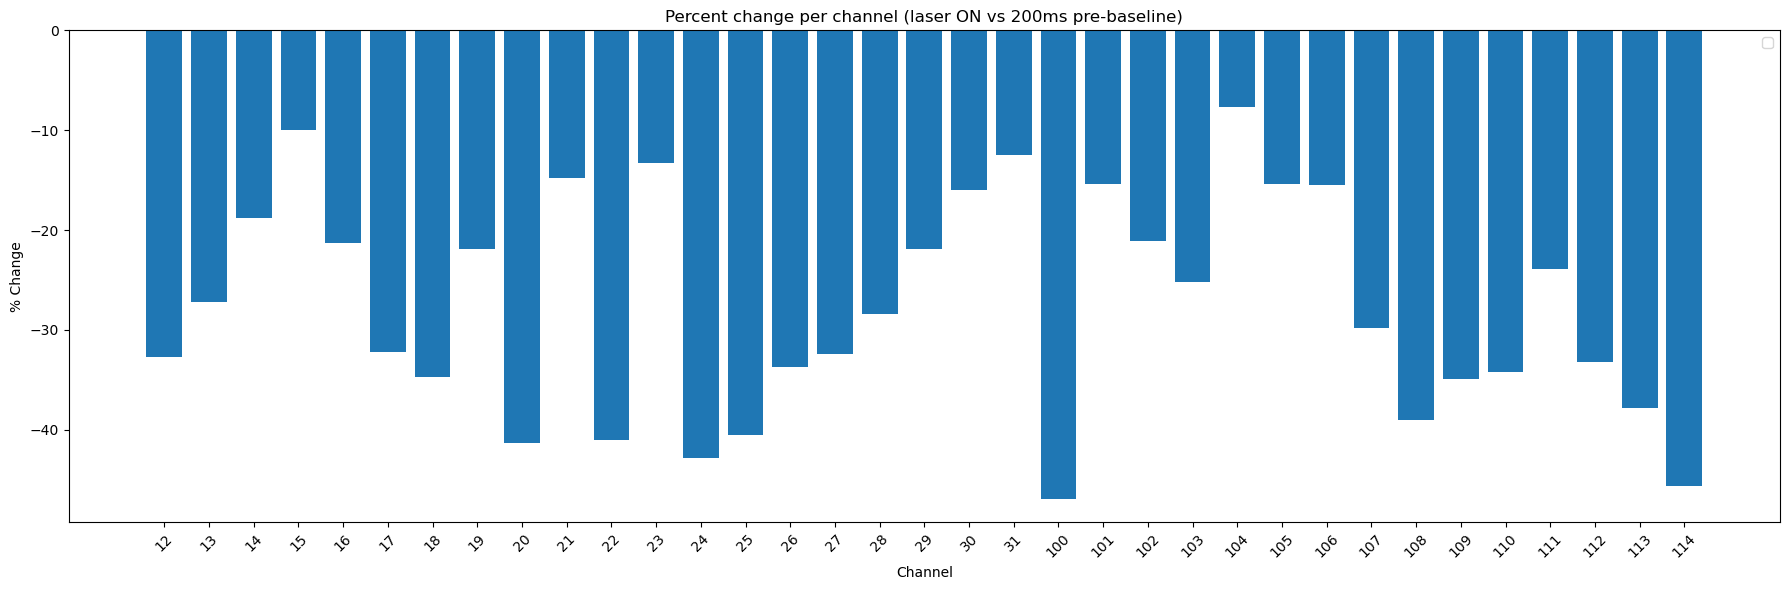

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))

# Bar plot
x_pos = np.arange(len(channels_to_analyze))
ax.bar(x_pos, percent_change)
# sig_indices = np.where(rejected)[0]
# if len(sig_indices) > 0:
#     ax.scatter(sig_indices, percent_change[sig_indices],
#                facecolors='none', edgecolors='k', s=80, linewidths=1.5, label='FDR sig.')
ax.axhline(0, color='k', lw=0.7)
ax.set_title(f"Percent change per channel (laser ON vs {int(pre_window*1000)}ms pre-baseline)")
ax.set_xlabel("Channel")
ax.set_ylabel("% Change")
ax.set_xticks(x_pos)
ax.set_xticklabels(channels_to_analyze, rotation=45 if len(channels_to_analyze) > 20 else 0)
if len(sig_indices) > 0:
    ax.legend()

plt.tight_layout()
plt.show()

In [35]:
interval = 0 #looking at lfp dose response now
epoch_start_time, epoch_stop_time, epoch_name = nwbf.intervals['epochs'][interval].to_numpy()[0]
laser_data = nwbf.processing['behavior'].data_interfaces['behavioral_events'].time_series['Laser'].data[:]
laser_timestamps = nwbf.processing['behavior'].data_interfaces['behavioral_events'].time_series['Laser'].timestamps[:]

laser_data_epoch = laser_data[(laser_timestamps>epoch_start_time) & (laser_timestamps<=epoch_stop_time)]
laser_data_epoch[0] = 0
laser_timestamps_epoch = laser_timestamps[(laser_timestamps>epoch_start_time) & (laser_timestamps<=epoch_stop_time)]

laser_on_times_epoch = laser_timestamps_epoch[laser_data_epoch==1]

first_laser_on_times = laser_on_times_epoch[np.append(np.diff(laser_on_times_epoch)>0.01,True)]

In [31]:
lowcut = 0.5
highcut = 400
pretime = 0.2

avg_traces = np.zeros((n_samples, len(channels_to_plot)))
count = 0

# loop through merged laser intervals
for start, stop in laser_on_intervals:
    onset = start
    start_t = onset - pre_time
    stop_t  = onset + post_time

    # Skip if window goes out of bounds
    if start_t < total_timestamps[0] or stop_t > total_timestamps[-1]:
        continue

    # Find nearest indices in total_timestamps
    idx_start = np.searchsorted(total_timestamps, start_t, side='left')
    idx_stop  = idx_start + n_samples
    if idx_stop > len(total_timestamps):
        continue

    # Extract ephys segment
    ephys_segment = nwbf.acquisition['e-series'].data[idx_start:idx_stop, :]
    filtered_segment = apply_bandpass_filter(ephys_segment, lowcut, highcut, fs)

    # Accumulate
    avg_traces += filtered_segment[:, channels_to_plot]
    count += 1

if count == 0:
    raise RuntimeError("No valid laser epochs found in this window length.")

avg_traces /= count
print(f"Averaged over {count} valid laser epochs.")

Averaged over 1892 valid laser epochs.


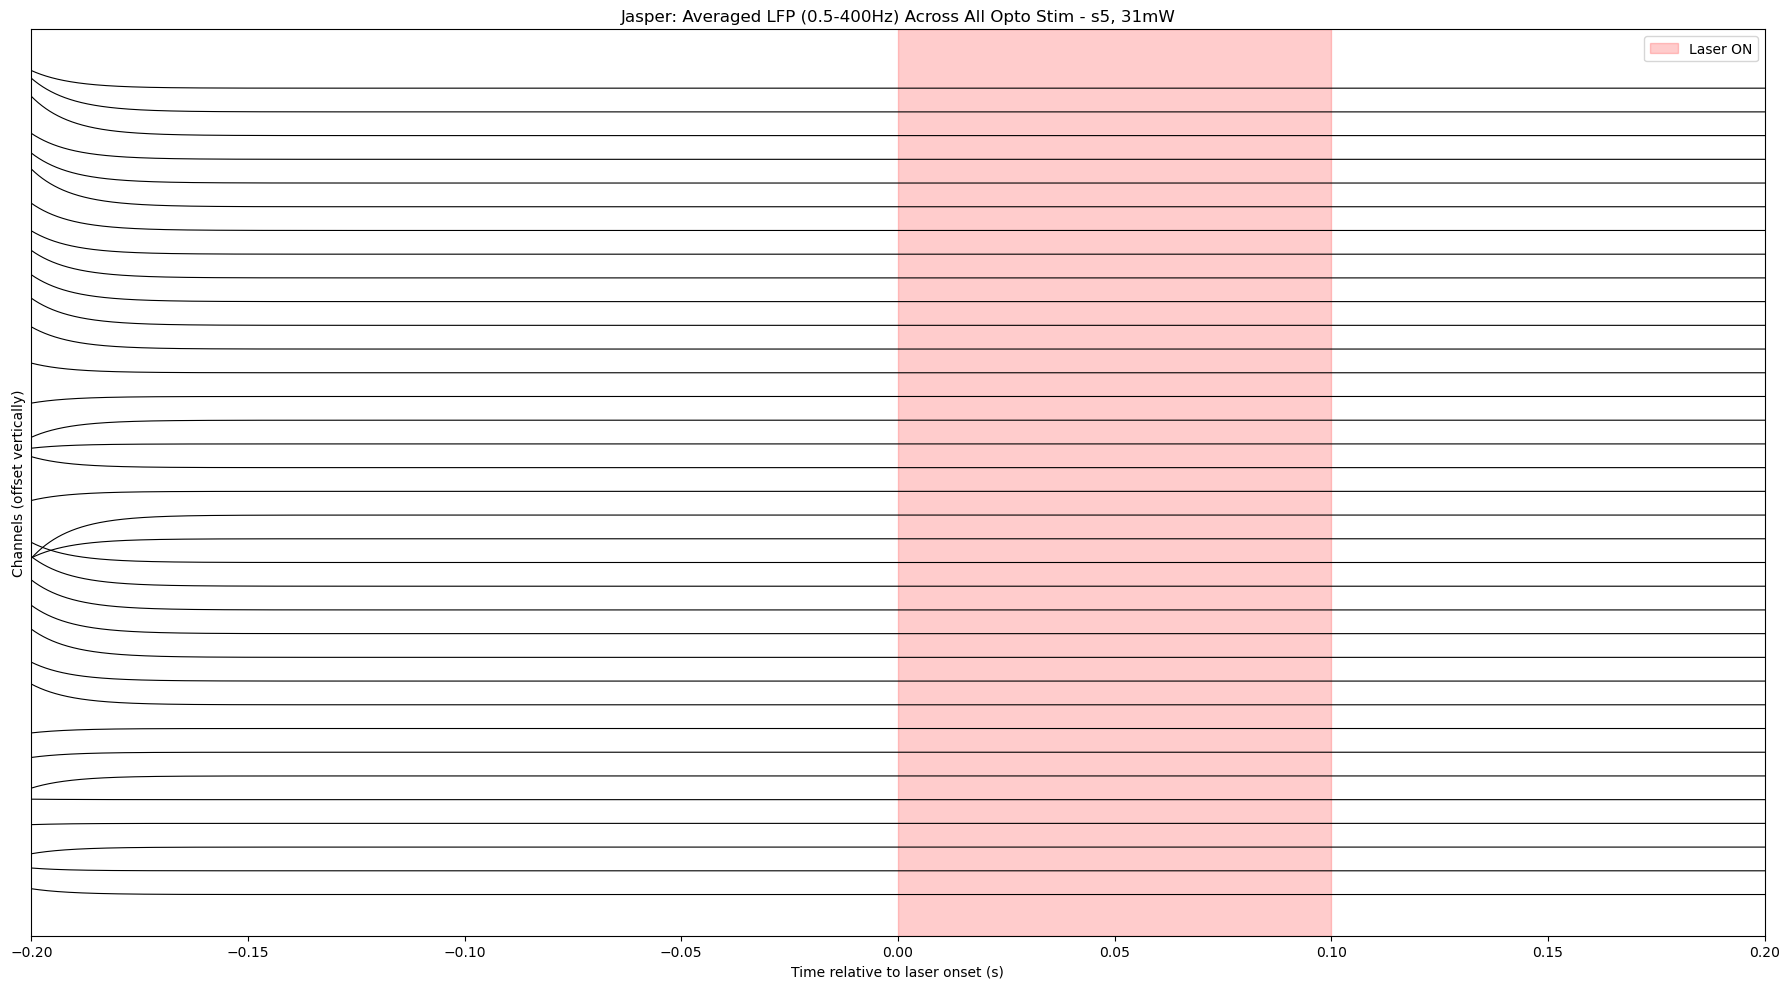

In [32]:
# LFP plot
fig, ax = plt.subplots(figsize=(18, 10))
offset = np.std(avg_traces)*10

for i, channel_idx in enumerate(channels_to_plot):
    ax.plot(
        t_rel,
        avg_traces[:, i] - i * offset,
        color='black',
        linewidth=0.8
    )

# Highlight laser ON window (0 to duration of merged train, approx 100ms)
ax.axvspan(0, 0.1, color='red', alpha=0.2, label='Laser ON')

ax.set_xlim([-pre_time, post_time])
ax.set_xlabel("Time relative to laser onset (s)")
ax.set_ylabel("Channels (offset vertically)")
ax.set_title("Jasper: Averaged LFP (0.5-400Hz) Across All Opto Stim - s5, 31mW")
ax.set_yticks([])
ax.set_facecolor('white')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()